# O naufrágio do Titanic é um dos mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o RMS Titanic, amplamente considerado "inafundável", afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse um elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: "que tipos de pessoas tinham mais probabilidade de sobreviver?" usando dados dos passageiros (como nome, idade, gênero, classe socioeconômica, etc.).

## 1 - Explorando os dados para analise

+ Extraindo os dados: importar o dataset e da uma primeira analisada
+ Limpar os dados: basicamente preencher os dados que faltarem
+ Faremos uma plotagem: vamos criar alguns graficos para ver algumas correlaçoes entre
a chance de sobreviver e de morrer do acidente 
+ Sera feita algumas hipoteses baseado nos graficos 

In [210]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params={ 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}

plot.rcParams.update(params)

Tem-se dois datasets disponiveis, um de treino e um de teste. Sera usado o de treino para
construir nosso modelo preditivo para testar o "score"(preciçao) e gerar o arquivo para ser submetido.

In [211]:
data=pd.read_csv(
    "D:\\Otas paradas V\\Machine learn titanic\\train.csv"
)

# Checando se tudo ocorreu como esperado
print(data.shape)

(891, 12)


Temos:
+ 891 linhas
+ 12 colunas

vamos agora dar uma breve observada

In [212]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


A coluna "Survived", se Survived estiver marcando 1 o passageiro sobreviveu, logo, quando for 0 o passageiro morreu.
Essa é a variavel que sera nosso "gabarito"

As outras variaveis serao as descriçoes dos passageiros.

+ PassengerId: um identificador atribuído a cada viajante no barco
+ Pclass: a classe do passageiro. Possui três valores + possíveis: 1, 2, 3 (primeira, segunda e terceira classe)
+ Name: O nome do passageiro
+ Sex: O sexo
+ Age: A idade
+ SibSp: número de irmãos e cônjuges viajando com o passageiro
+ Parch: número de pais e filhos viajando com o passageiro
+ Ticket: O número do bilhete
+ Fare: A tarifa do bilhete
+ Cabin: O número da cabine
+ Embarked: O local de embarque. Isso descreve três áreas possíveis do Titanic a partir das quais as pessoas embarcam. Três valores possíveis: S, C, Q

Pandas permite que você tenha uma descrição estatística simples de alto nível das características numéricas. Isso pode ser feito usando o método describe.

In [213]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A contagem mostra que temos apenas 714 linhas preenchidas para Idade do total de 891, temos entao que preencher o restante.

Uma boa soluçao para este caso é preencher as colunas faltantes com a media de idade.

In [214]:
data["Age"] = data["Age"].fillna(data["Age"].median())

Checando se tudo ocorreu como esperado.

In [215]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Tudo certo.

Vamos entao fazer algumas plotagens.

Começaremos ver a taxa de sobrevivencia baseada no genero do passageiro.

In [216]:
data['Died'] = 1 - data["Survived"]

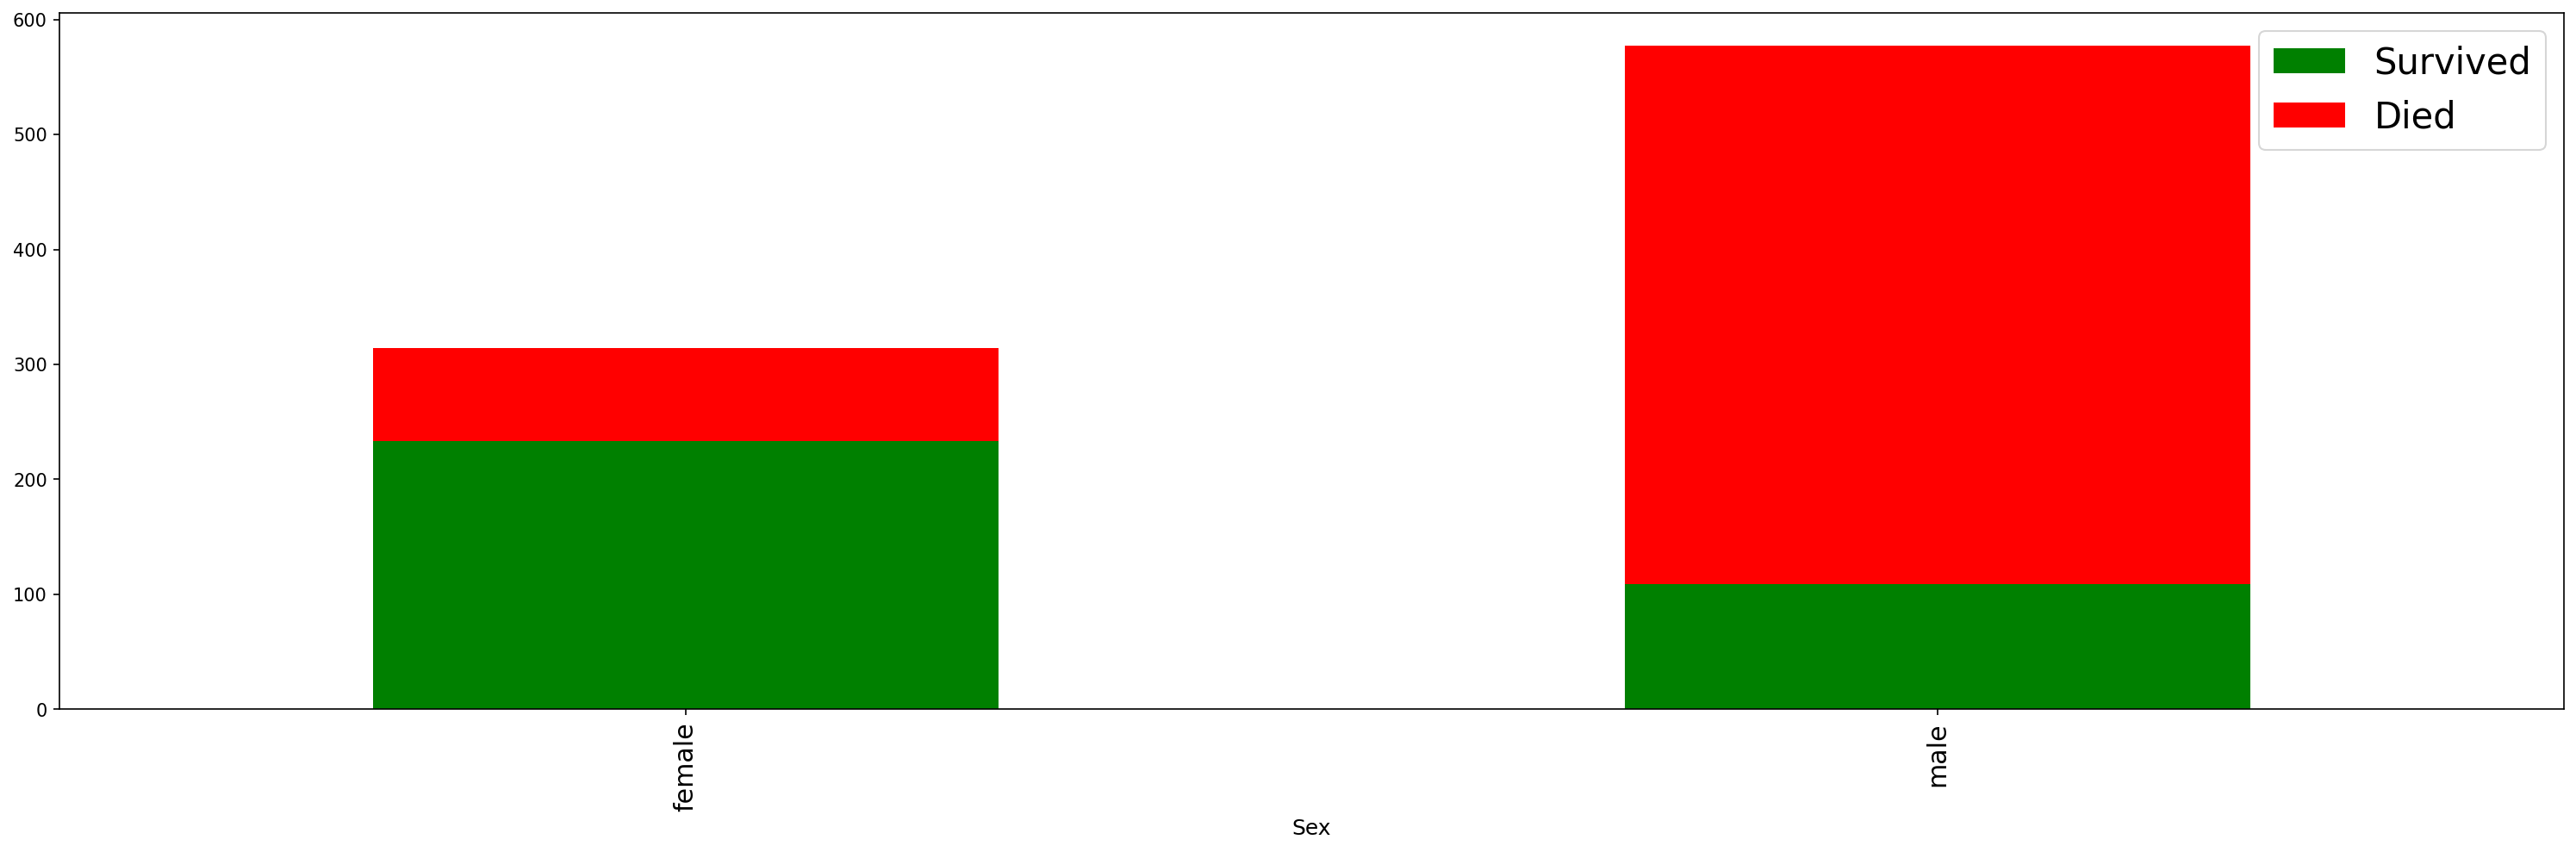

In [217]:
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(
    kind="bar",
    figsize=(25, 7),
    stacked=True,
    color=['g', 'r']
);

O grafico demonstra que um passageiro do sexo masculino tem uma chance muito superior a sucumbir

vamos agora avaliar em termos de proporçao esse resultado.

In [218]:
prop_por_sexo = data.groupby('Sex')['Survived'].mean()
print(prop_por_sexo)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Com esses dados é possivel ver que dos sobreviventes baseados no "sexo"
homens sao apenas ~19%, enquanto mulheres sao ~74%.

Mas isso seria normal, afinal, mulheres e crianças sao resgatadas primeiro, certo?

Vamos correlacionar agira a taxa de sobrevivencia com a variavel Idade

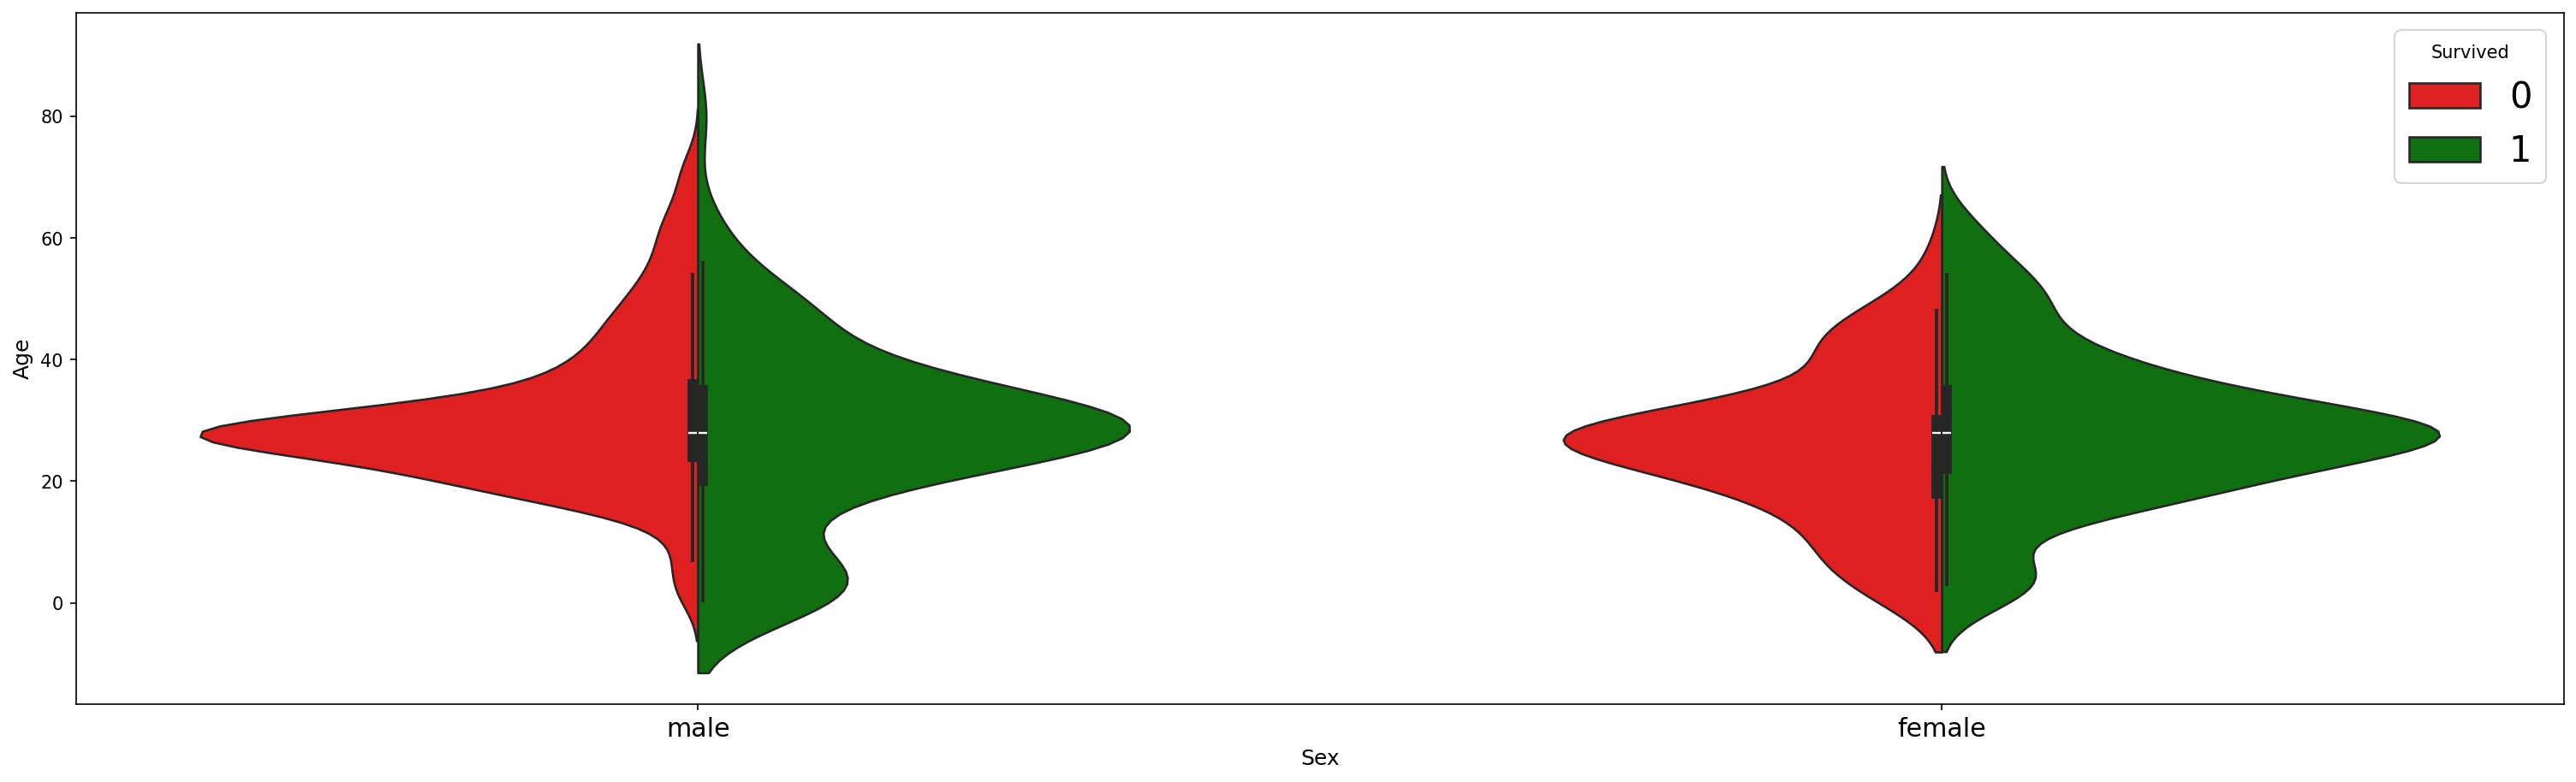

In [219]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(
    x="Sex", y='Age',
    hue='Survived', data=data,
    split=True,
    palette={0: 'r', 1: 'g'}
);

Apos a correlaçao de idade junto ao sexo fica claro algumas coisas:
+ Mulheres sobrevivem mais que homens, baseado na area verde do grafico

Pode-se ver tb que:
+ A idade para homens mostram que:

    <ul style="list-style-type: square;">
        <li>Homens mais jovens tendem a sobreviver</li>
        <li>Um grande numero de homens entre 20 e 40 anos sucumbiram</li>
    </ul>
+ A idade para mulheres nao mostram um impacto direto na taxa de sobrevivencia.

Confirmando o que foi dito anteriormente "Mulheres e crianças primeiro"

Vamos agora focar no valor da passagem de cada passageiro e ver como isso impacta na taxa de sobrevivencia.

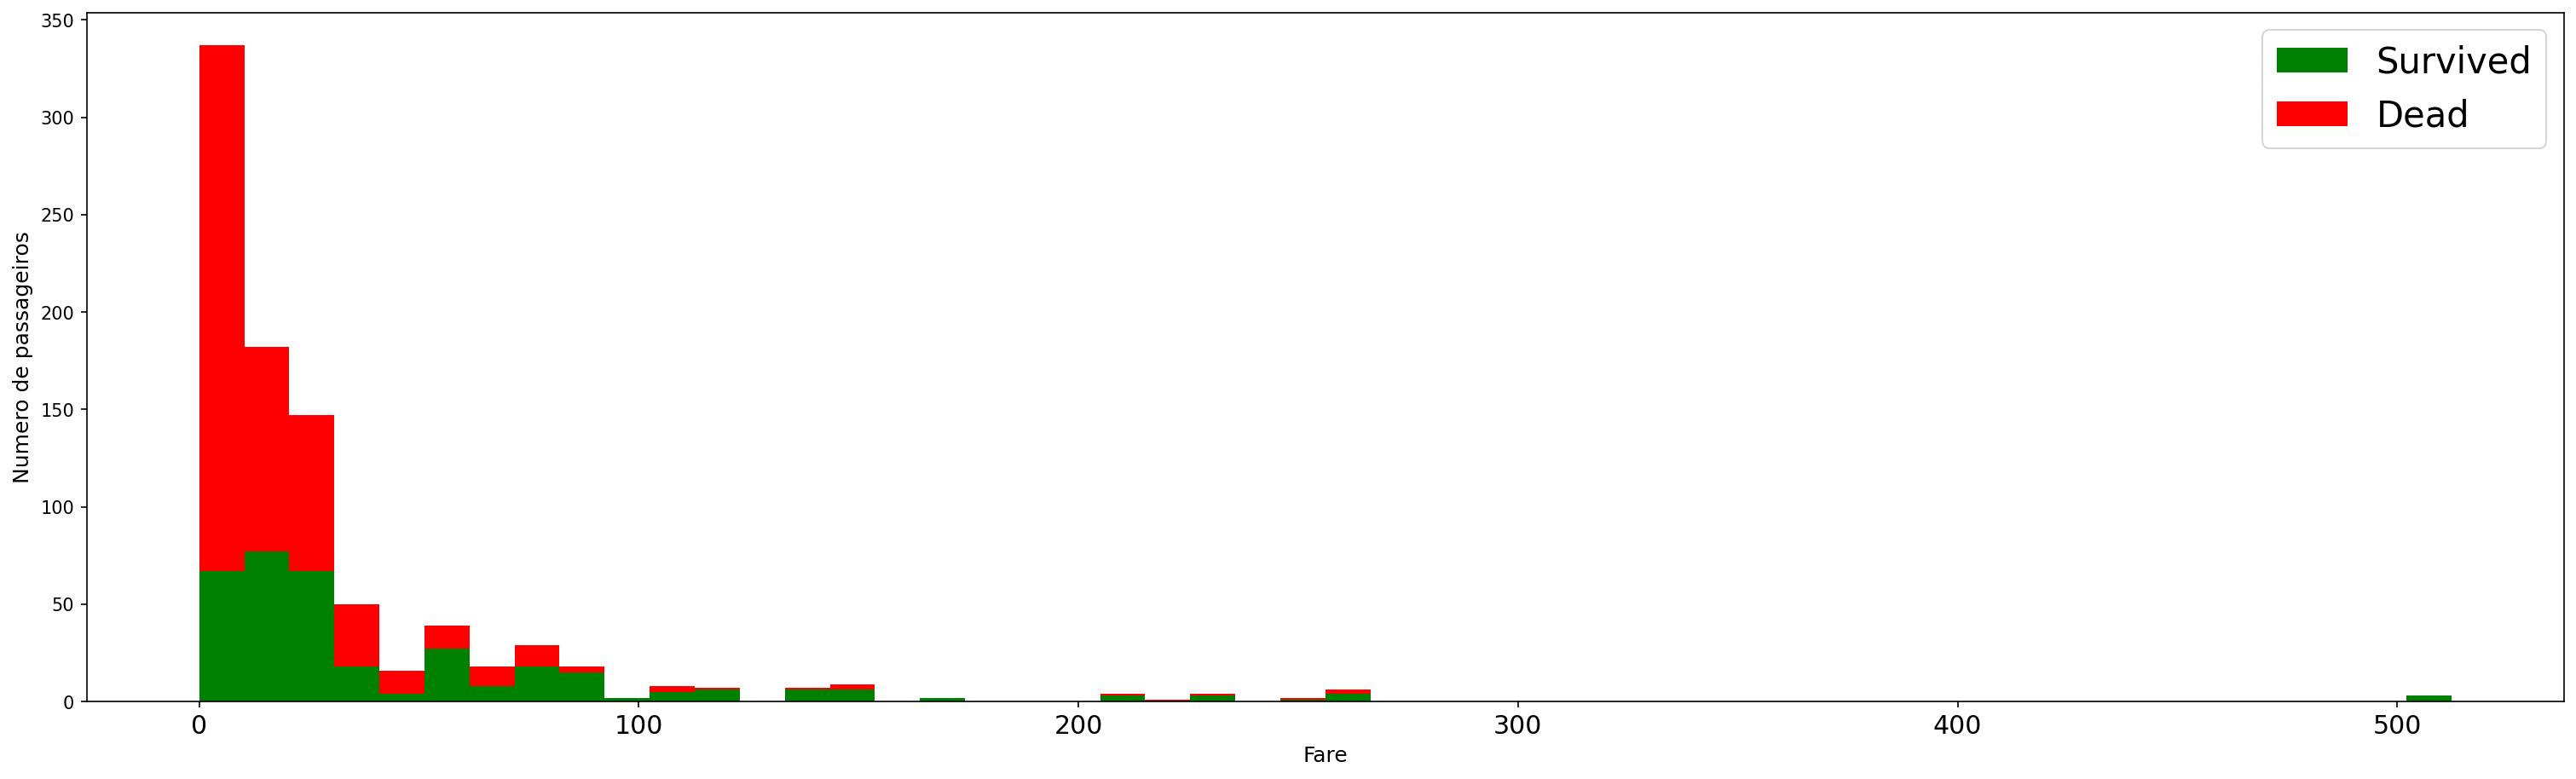

In [220]:
figure = plt.figure(figsize=(25, 7))
plt.hist(
    [data[data["Survived"] == 1]['Fare'], data[data['Survived'] == 0]['Fare']],
    stacked=True, color = ['g', 'r'],
    bins=50, label=['Survived', 'Dead']
)
plt.xlabel('Fare')
plt.ylabel('Numero de passageiros')
plt.legend();

Passageiros com o ingresso mais barato tendem a morrer. Colocando de outra forma,
passageiros com o ingresso mais caro, em outras palavras, com um "status social" mais importante,
aparentemente são resgatados primeiro.

Vamos agora combinar a idade e o valor dos intressos em um unico grafico.

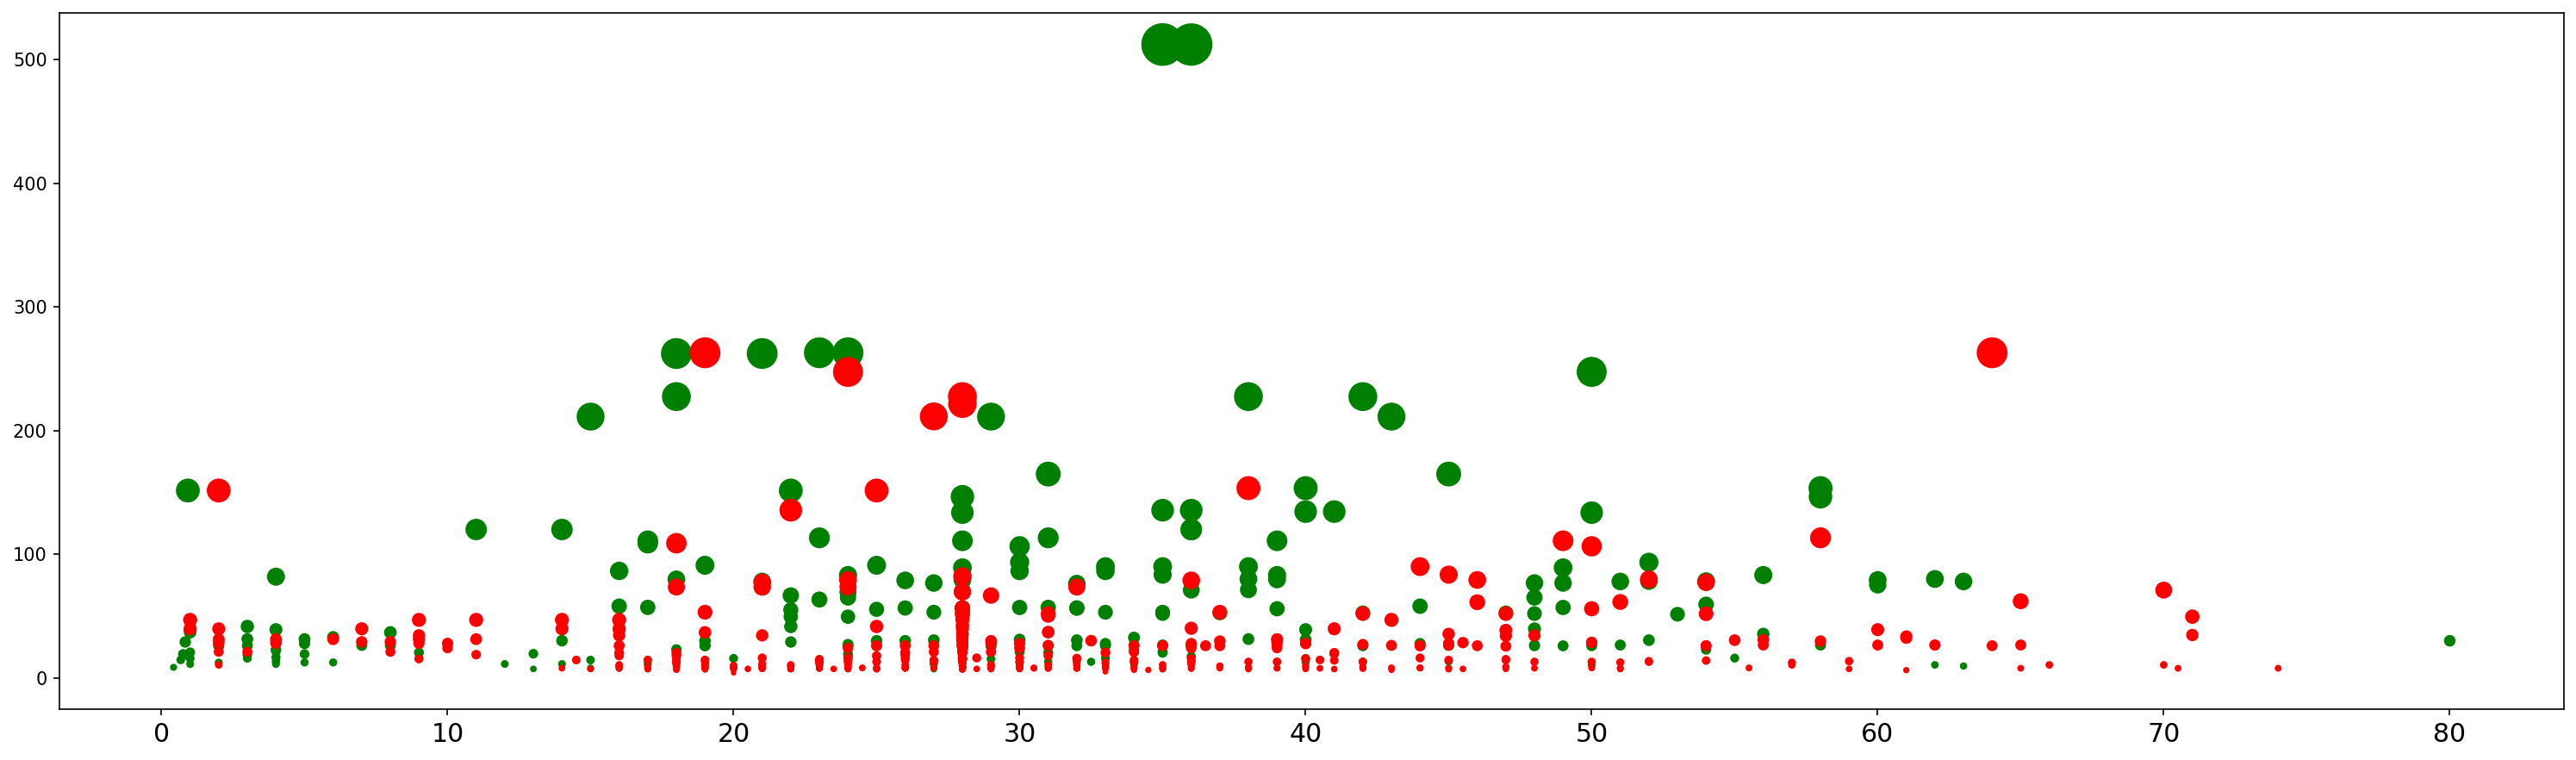

In [221]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(
    data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'],
    c='green', s=data[data['Survived'] == 1]['Fare']
)

ax.scatter(
    data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'],
    c='red', s=data[data['Survived'] == 0]['Fare']
)

o Tamanho dos circulos é proporcional a tarifa do ingresso.

No eixo x, temos a idade dos passageiros, no eixo y, esta sendo considerado o valor.

É possivel observar diferentes agrupamentos:
+ Grandes circulos verdes entre x=20 e x=45: Adultos com tarifa alta em seus ingressos
+ Pequenos circulos vermelhos entre x=10 e x=45: Adultos de classe baixa, tarifa baixa em seus ingressos
+ Pequenos circulos verde entre x=0 e x=7, sao crianças que foram resgatadas

Como um fato de importancia, a tarifa do ingresso tem correlaçao com grafico como visto abaixo.

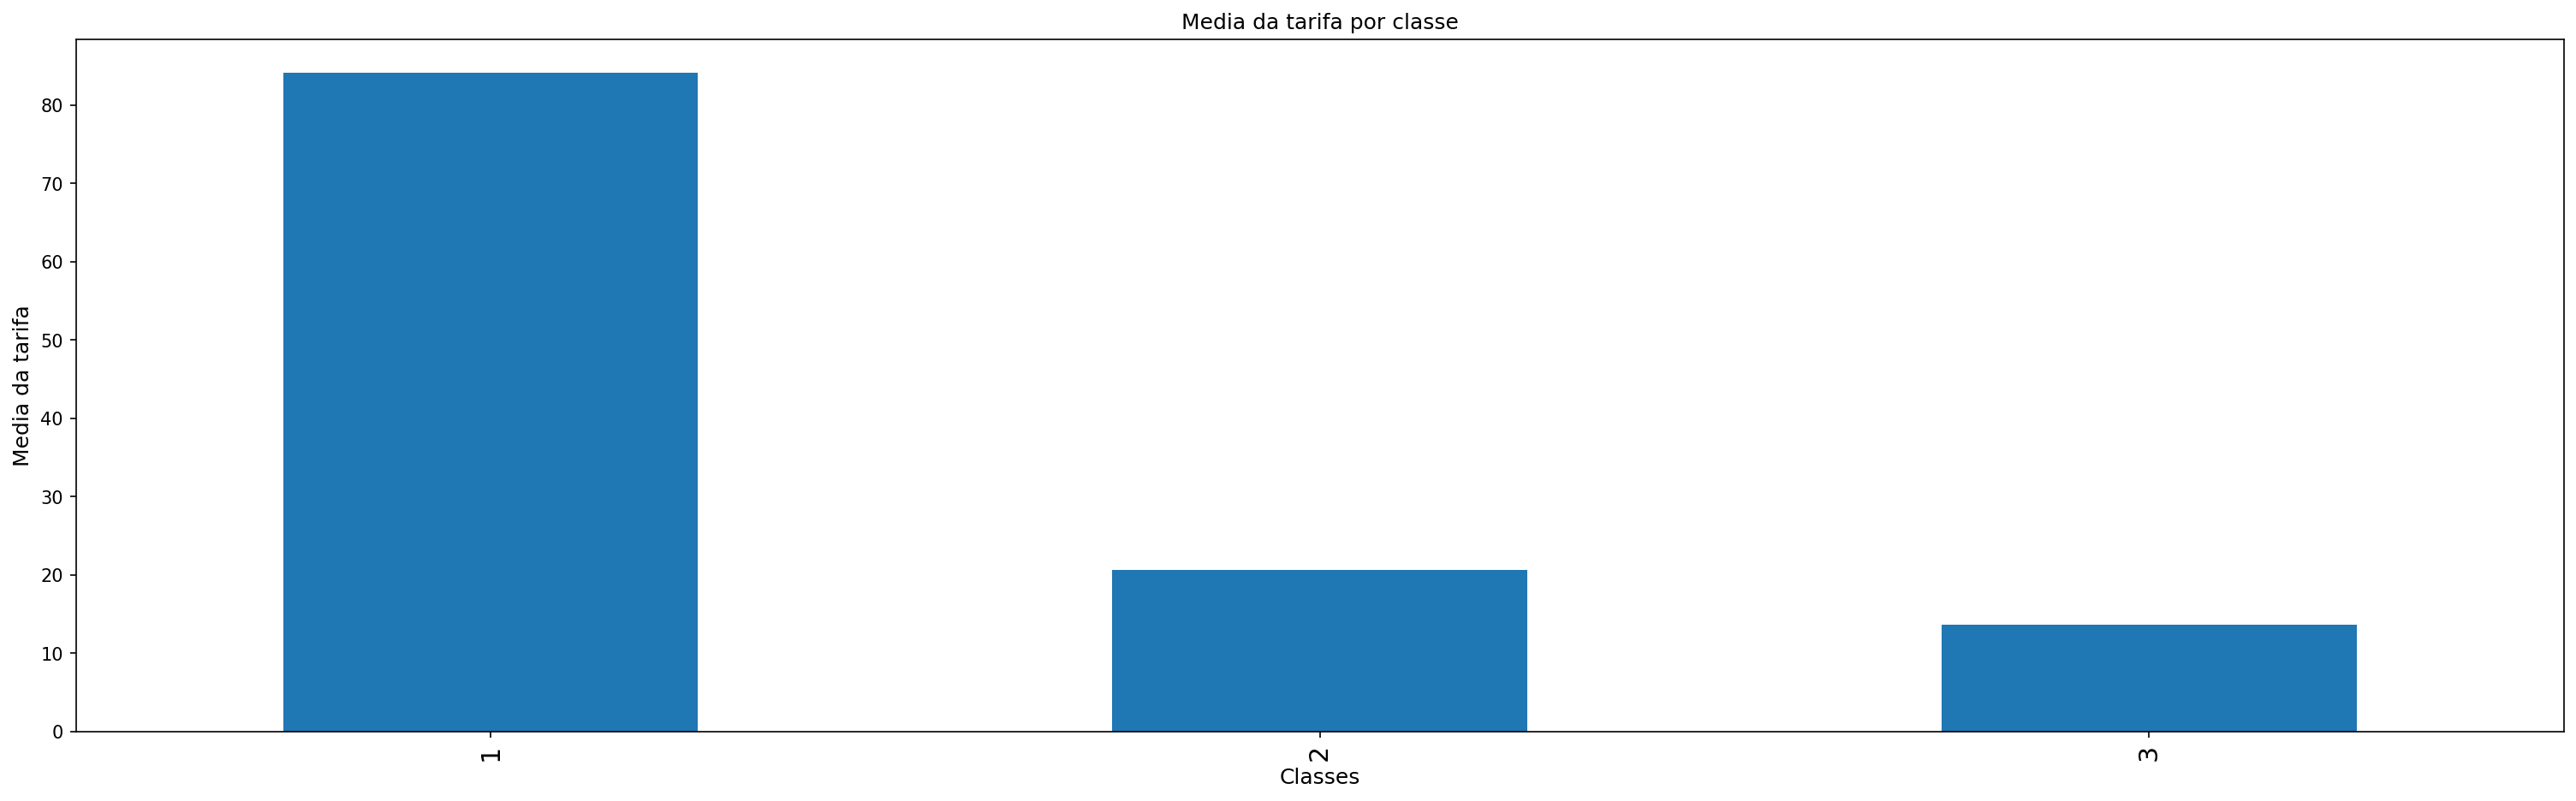

In [222]:
ax = data.groupby('Pclass')['Fare'].mean().plot(
    kind='bar', figsize=(25, 7)
)

ax.set_ylabel('Media da tarifa')
ax.set_xlabel('Classes')
ax.set_title('Media da tarifa por classe')

plt.show()

Agora vamos ver como o local de embarque influencia na taxa de sobrevivencia

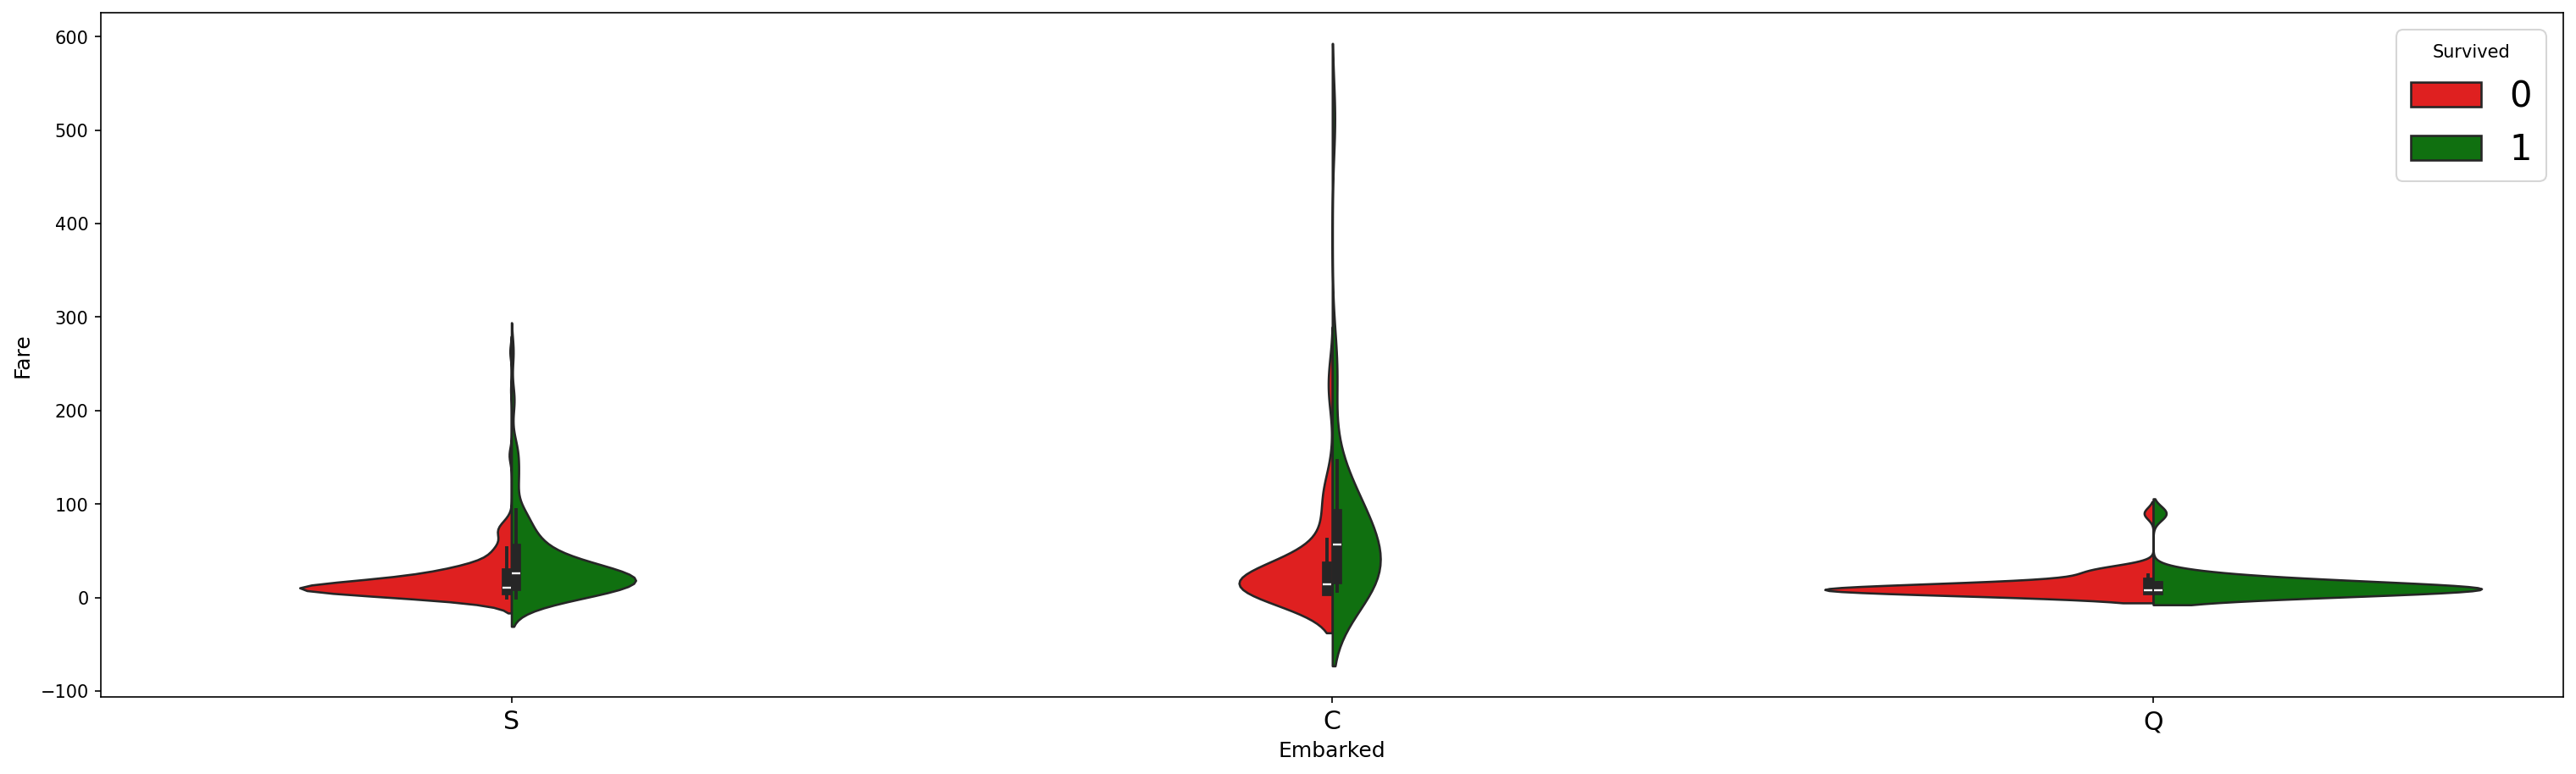

In [223]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(
    x='Embarked', y='Fare',
    hue='Survived', data=data,
    split=True, palette={0: 'r', 1: 'g'}
);

Parece que o embarque no C tem uma faixa mais ampla de tarifas de bilhetes e, portanto, os passageiros que pagam os preços mais altos são aqueles que sobrevivem.

Também observamos isso acontecendo no embarque em S e em menor medida no embarque em Q.

Agora vamos para de explorar a nossa base de dados e vamos para proxima parte

## 2- Tratando os recursos e preparando para receber o modelo.

Na primeira parte tivemos uma previa dos dados importados e conseguimos identificar algumas correlaçoes.

Nessa parte, veremos como processar e transformar essas variaveis de uma forma que a gente possa
trabalhar com o nosso modelo de aprendizado (machine learning).

Tambem criaremos nossos proprios recursos que serao uteis para construir um modelo.

Veremos ao longo do caminho como processar variaveis de texto como os nomes dos passageiros e integrar essas informaçoes ao nosso modelo.

Vamos separar nosso codigo em funçoes para de mais clareza.

Mas primeiro, vamos definir uma funcao para "printar" na tela se ocorreu tudo bem com o tratamento.

In [224]:
def status(feature):
    print(f'Processing {feature}: ok')

### Carregando os dados

Um problema que geralmente ocorre com machine learning é agrupar os dados de treino e teste juntos.

Vamos construir um novo recurso usando os dados de treino para evitar vazamento de dados.E entao vamos adicionar essas variaveis com os dados de teste.

Vamos carregar os dados de treino e teste e agrupa-los.

In [225]:
def get_combined_data():
    # fazendo a leitura dos dados de treino
    train = pd.read_csv(
        "D:\\Otas paradas V\\Machine learn titanic\\train.csv"
    )

    # fazendo a leitura dos dados de teste
    test = pd.read_csv(
        "D:\\Otas paradas V\\Machine learn titanic\\test.csv"
    )

    # extraindo e removendo nosso gabarito dos dados de treino
    target = train.Survived
    train.drop(columns=['Survived'], inplace=True)

    # juntando os dados de treino e teste para futuros recursos
    # vamos tambem remover a coluna "PassagerID", ja que nao é uma coluna informativa de fato
    combined = pd.concat([train, test], ignore_index=True)
    combined.drop(columns=['PassengerId'], inplace=True)
  
    return combined

In [226]:
combined = get_combined_data()

Vamos avaliar a estrutura como ficou

In [227]:
print(combined.shape)

(1309, 10)


Os dados de teste e treino foram combinados perfeitamente.

Voce pode notar que o total de linhas 1309 é exatamente o numero de linhas somando treino e teste separadamente.

In [228]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extraindo os titulos dos passageiros

Ao examinar os nomes dos passageiros, pode-se questionar como processá-los para extrair informações úteis.

Se voce olhar de perto vai ver esses exemplos:
+ Braund, Mr. Owen Harris
+ Heikkinen, Miss. Laina
+ Oliva y Ocana, Dona. Fermina
+ Peter, Master. Michael J

Voce vai reparar que cada nome tem um titulo contido nele!
Isso pode ser um simples Miss. or Mrs. mas as vezes pode conter algo mais sofisticado como Master, Sir, ou Dona. Nesse caso, a gente pode introduzir uma informaçao adicional como status social, simplesmente analisando o nome e extraindo o titulo, convertendo-o para uma variavel binaria.

Vamos ver como vamos fazer isso na funçao abaixo.

Primeiro vamos ver quais os titulos temos no set.

In [229]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())


In [230]:
print(titles)

{'Major', 'Mlle', 'Jonkheer', 'Rev', 'Ms', 'Lady', 'Dr', 'Sir', 'Master', 'Col', 'Don', 'Mme', 'Mrs', 'the Countess', 'Miss', 'Mr', 'Capt'}


In [231]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # vamos extrair o titulo de cada nome
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

    # um mapa de titulos mais agregados
    # mapeamos cada titulo
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

A funçao analisa cada nome e extrai seus titulos. Depois, mapeia o titulo na categoria de titulos que a gente selecionou:

+ Officer
+ Royalty
+ Mr
+ Mrs
+ Miss
+ Master

vamos rodar e ver se tudo ocorreu como esperado

In [232]:
combined = get_titles()

Processing Title: ok


In [233]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Vamos checar se tudo foi preenchido corretamente.

In [234]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


De fato tem-se um valor vazio na linha 1305.

O titulo nao foi encontrado no dataset de treino.

Agora temos uma coluna adicional chamada de "Title".

### Tratando agora as idades

Foi visto na primeira parte que a variavel 'Age' estava com 177 valores faltantes.
Isso é um numero grande (aproximadamente 13%). Simplesmente preencher esses valores com a media pode nao ser o melhor senario, desde que idade pode diferir por grupos e categoria de passageiros

Para entender o porque, vamos agrupar nosso banco de dados por Sex, Title e Pclass para cara subdados e computar a media de idade

Para evitar vazamento de dados do conjunto de teste, preenchemos idades ausentes no conjunto de treinamento usando o próprio conjunto de treinamento, e preenchemos as idades no conjunto de teste usando valores calculados a partir do conjunto de treinamento também.

Número de idades ausentes no conjunto de treinamento.

In [235]:
print(combined.iloc[:891].Age.isnull().sum())

177


Numero de idades faltantes no conjunto de teste

In [236]:
print(combined.iloc[891:].Age.isnull().sum())

86


In [237]:
grouped_median_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])['Age'].median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [238]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


Esse pequeno conjunto de dados vai nos ajudar a incluir as idades faltantes baseado em criterios diferentes.

Olhe para a coluna "Age" e veja como pode ser diferente baseada com Sexo, Pclass e Tittle.

Por exemplo:

+ Se o passageiro for do sexo feminino, da Pclass 1, e da realeza, sua media de idade é 40.5.
+ Se o passageiro for do sexo masculino, da Pclass 3, com titulo de Mr., sua media é de 26.

Vamos criar uma função que preenche a idade ausente em 'combined' com base nesses diferentes atributos.

In [239]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(
        lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1
    )
    status('age')
    return combined

In [240]:
combined = process_age()

Processing age: ok


Perfeito. As idades foram realocadas.

Entretando, foi noticiado valores faltantes em Fare, e dois faltantes no Embarked e varios faltando na variavel Cabin. Voltaremos nessas variaveis mais tarde.

Vamo processar os nomes.

In [249]:
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    
    # Convertendo as variáveis binárias para valores numéricos (0 e 1)
    titles_dummies = titles_dummies.astype(int)
    
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined


Essa função exclui a coluna Name, uma vez que não a utilizaremos mais, pois criamos uma coluna Title.

Em seguida, codificamos os valores dos títulos usando uma codificação dummy.

In [250]:
combined = process_names()

Processing names: ok


In [251]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


Como pode-se ver:

+ nao tem mais a variavel nome
+ uma nova variavel (Title_X) apareceu. É um recurso binario. por exemplo, se o titulo for Title_Mr = 1, significa que é True.

### Processando a tarifa de embarque

Vamor impor os valores faltantes com uma media.

In [252]:
def process_fares():
    global combined
    # só tem um valor faltante, logo, utilizar mean() é uma boa forta
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

Essa funcao simplesmente completa o valor faltante com a media.

In [253]:
combined = process_fares()

Processing fare: ok


### Processando embarked

In [254]:
def process_embarked():
    global combined
    # dois valores faltantes - preencher com o valor que mais aparece (S)
    combined.Embarked.fillna('S', inplace=True)
    # codificador ficticio
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix=['Embarked'])

    embarked_dummies = embarked_dummies.astype(int)

    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop(columns=['Embarked'], inplace=True)

    status('embarked')
    return combined

Essa funcao vai preencher dois valores com os valores mais frequentes de embarque

In [255]:
combined = process_embarked()

Processing embarked: ok


In [256]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,['Embarked']_C,['Embarked']_Q,['Embarked']_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


### Processando Cabin

In [261]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')

for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [260]:
print(train_cabin)

{'C', 'G', 'U', 'D', 'A', 'F', 'E', 'B', 'T'}


In [262]:
print(test_cabin)

{'C', 'G', 'U', 'D', 'A', 'F', 'E', 'B'}


Não temos nenhuma letra de cabine no conjunto de teste que não esteja presente no conjunto de treinamento.

In [263]:
def process_cabin():
    global combined
    # preenchendo os dados vazios com 'U'(unknow/desconhecido)
    combined.Cabin.fillna('U', inplace=True)

    # mapeando cada valor de cabine baseado com a letra
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])

    # codificador ficticio...
    cabins_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')

    cabins_dummies = cabins_dummies.astype(int)

    combined = pd.concat([combined, cabins_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

Essa funcao preenche os valores NaN com U, depois mapea cada valor de cabine baseado em sua primeira letra.

E entao codifica usando o codificador ficticio.

In [264]:
combined = process_cabin()

Processing cabin: ok


Sem valores vazios agora

In [265]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,['Embarked']_C,['Embarked']_Q,['Embarked']_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Processando sexo

In [266]:
def process_sex():
    global combined
    # mapeando a string para valores numericos
    combined['Sex'] = combined['Sex'].map({'male': 1, 'female': 0})
    status('sex')
    return combined

A funcao mapeia as strings e define os valores 1 para masculino e 0 para feminino

In [267]:
combined = process_sex()

Processing sex: ok


### Process Pclass

In [269]:
def process_pclass():
    global combined
    # codificando para 3 categorias:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass')

    pclass_dummies = pclass_dummies.astype(int)

    # adicionando a variavel ficticia
    combined = pd.concat([combined, pclass_dummies], axis=1)
    
    # removendo a variavel Pclass
    combined.drop(columns=['Pclass'], inplace=True)
    status('Pclass')
    return combined

A funcao codifica os valores de pclass com (1,2,3)

In [270]:
combined = process_pclass()

Processing Pclass: ok


In [271]:
combined.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,['Embarked']_C,['Embarked']_Q,['Embarked']_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


### Processando os ingressos

Vamos primeiro ver quais são os diferentes prefixos de bilhetes que temos em nosso conjunto de dados.

In [277]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [278]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [279]:
print(len(tickets))

37


In [282]:
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')

    tickets_dummies = tickets_dummies.astype(int)
    
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

In [283]:
combined = process_ticket()

Processing Ticket: ok


In [284]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,['Embarked']_C,['Embarked']_Q,['Embarked']_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Processamento da Família

Esta parte inclui a criação de novas variáveis com base no tamanho da família (o tamanho é, aliás, outra variável que criamos).

Essa criação de novas variáveis é feita sob uma suposição realista: famílias grandes são agrupadas, portanto, têm mais chances de serem resgatadas do que pessoas viajando sozinhas.

In [285]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined

Esta função introduz 4 novas características:

+ FamilySize: o número total de parentes, incluindo o passageiro (ele/ela mesmo).
+ Singleton: uma variável booleana que descreve famílias de tamanho = 1.
+ SmallFamily: uma variável booleana que descreve famílias com 2 <= tamanho <= 4.
+ LargeFamily: uma variável booleana que descreve famílias com tamanho > 5.

In [286]:
combined = process_family()

Processing family: ok


In [287]:
print(combined.shape)

(1309, 67)


Terminamos com 67 colunas para analise

In [288]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,['Embarked']_C,['Embarked']_Q,['Embarked']_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


### III - Modelagem
Nesta parte, usamos nosso conhecimento sobre os passageiros com base nas características que criamos e, em seguida, construímos um modelo estatístico. Você pode pensar nesse modelo como uma caixa que analisa as informações de qualquer novo passageiro e decide se ele sobrevive ou não.

Existem várias opções de modelos a serem utilizados, desde regressão logística até árvores de decisão e modelos mais sofisticados, como florestas aleatórias (Random Forests) e árvores impulsionadas por gradiente.

Voltando ao nosso problema, agora precisamos:

+ Dividir o conjunto de dados combinado em conjunto de treinamento e conjunto de teste.
+ Usar o conjunto de treinamento para construir um modelo preditivo.
+ Avaliar o modelo usando o conjunto de treinamento.
+ Testar o modelo usando o conjunto de teste e gerar um arquivo de saída para a submissão.

Tenha em mente que teremos que iterar nos passos 2 e 3 até alcançar uma pontuação de avaliação aceitável.

Vamos começar importando as bibliotecas úteis.

In [290]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

Para avaliar nosso modelo, usaremos uma validação cruzada de 5 dobras com base na precisão, pois é a métrica que a competição utiliza no leaderboard.

Para fazer isso, vamos definir uma pequena função de pontuação.

In [291]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

Recuperar o conjunto de treinamento e o conjunto de teste a partir do conjunto de dados combinado é uma tarefa fácil.

In [294]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv(
        "D:\\Otas paradas V\Machine learn titanic\\train.csv", usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [295]:
train, test, targets = recover_train_test_target()

### Seleção de características

Até agora, chegamos a mais de 30 recursos. Este número é bastante grande.

Quando a engenharia de características é realizada, geralmente tentamos reduzir a dimensionalidade selecionando o número "correto" de recursos que capturam o essencial.

Na verdade, a seleção de características traz muitos benefícios:

+ Reduz a redundância entre os dados
+ Acelera o processo de treinamento
+ Diminui o overfitting

Estimadores baseados em árvores podem ser usados para calcular a importância das características, que por sua vez pode ser usado para descartar características irrelevantes.

In [296]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [297]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<Axes: ylabel='feature'>

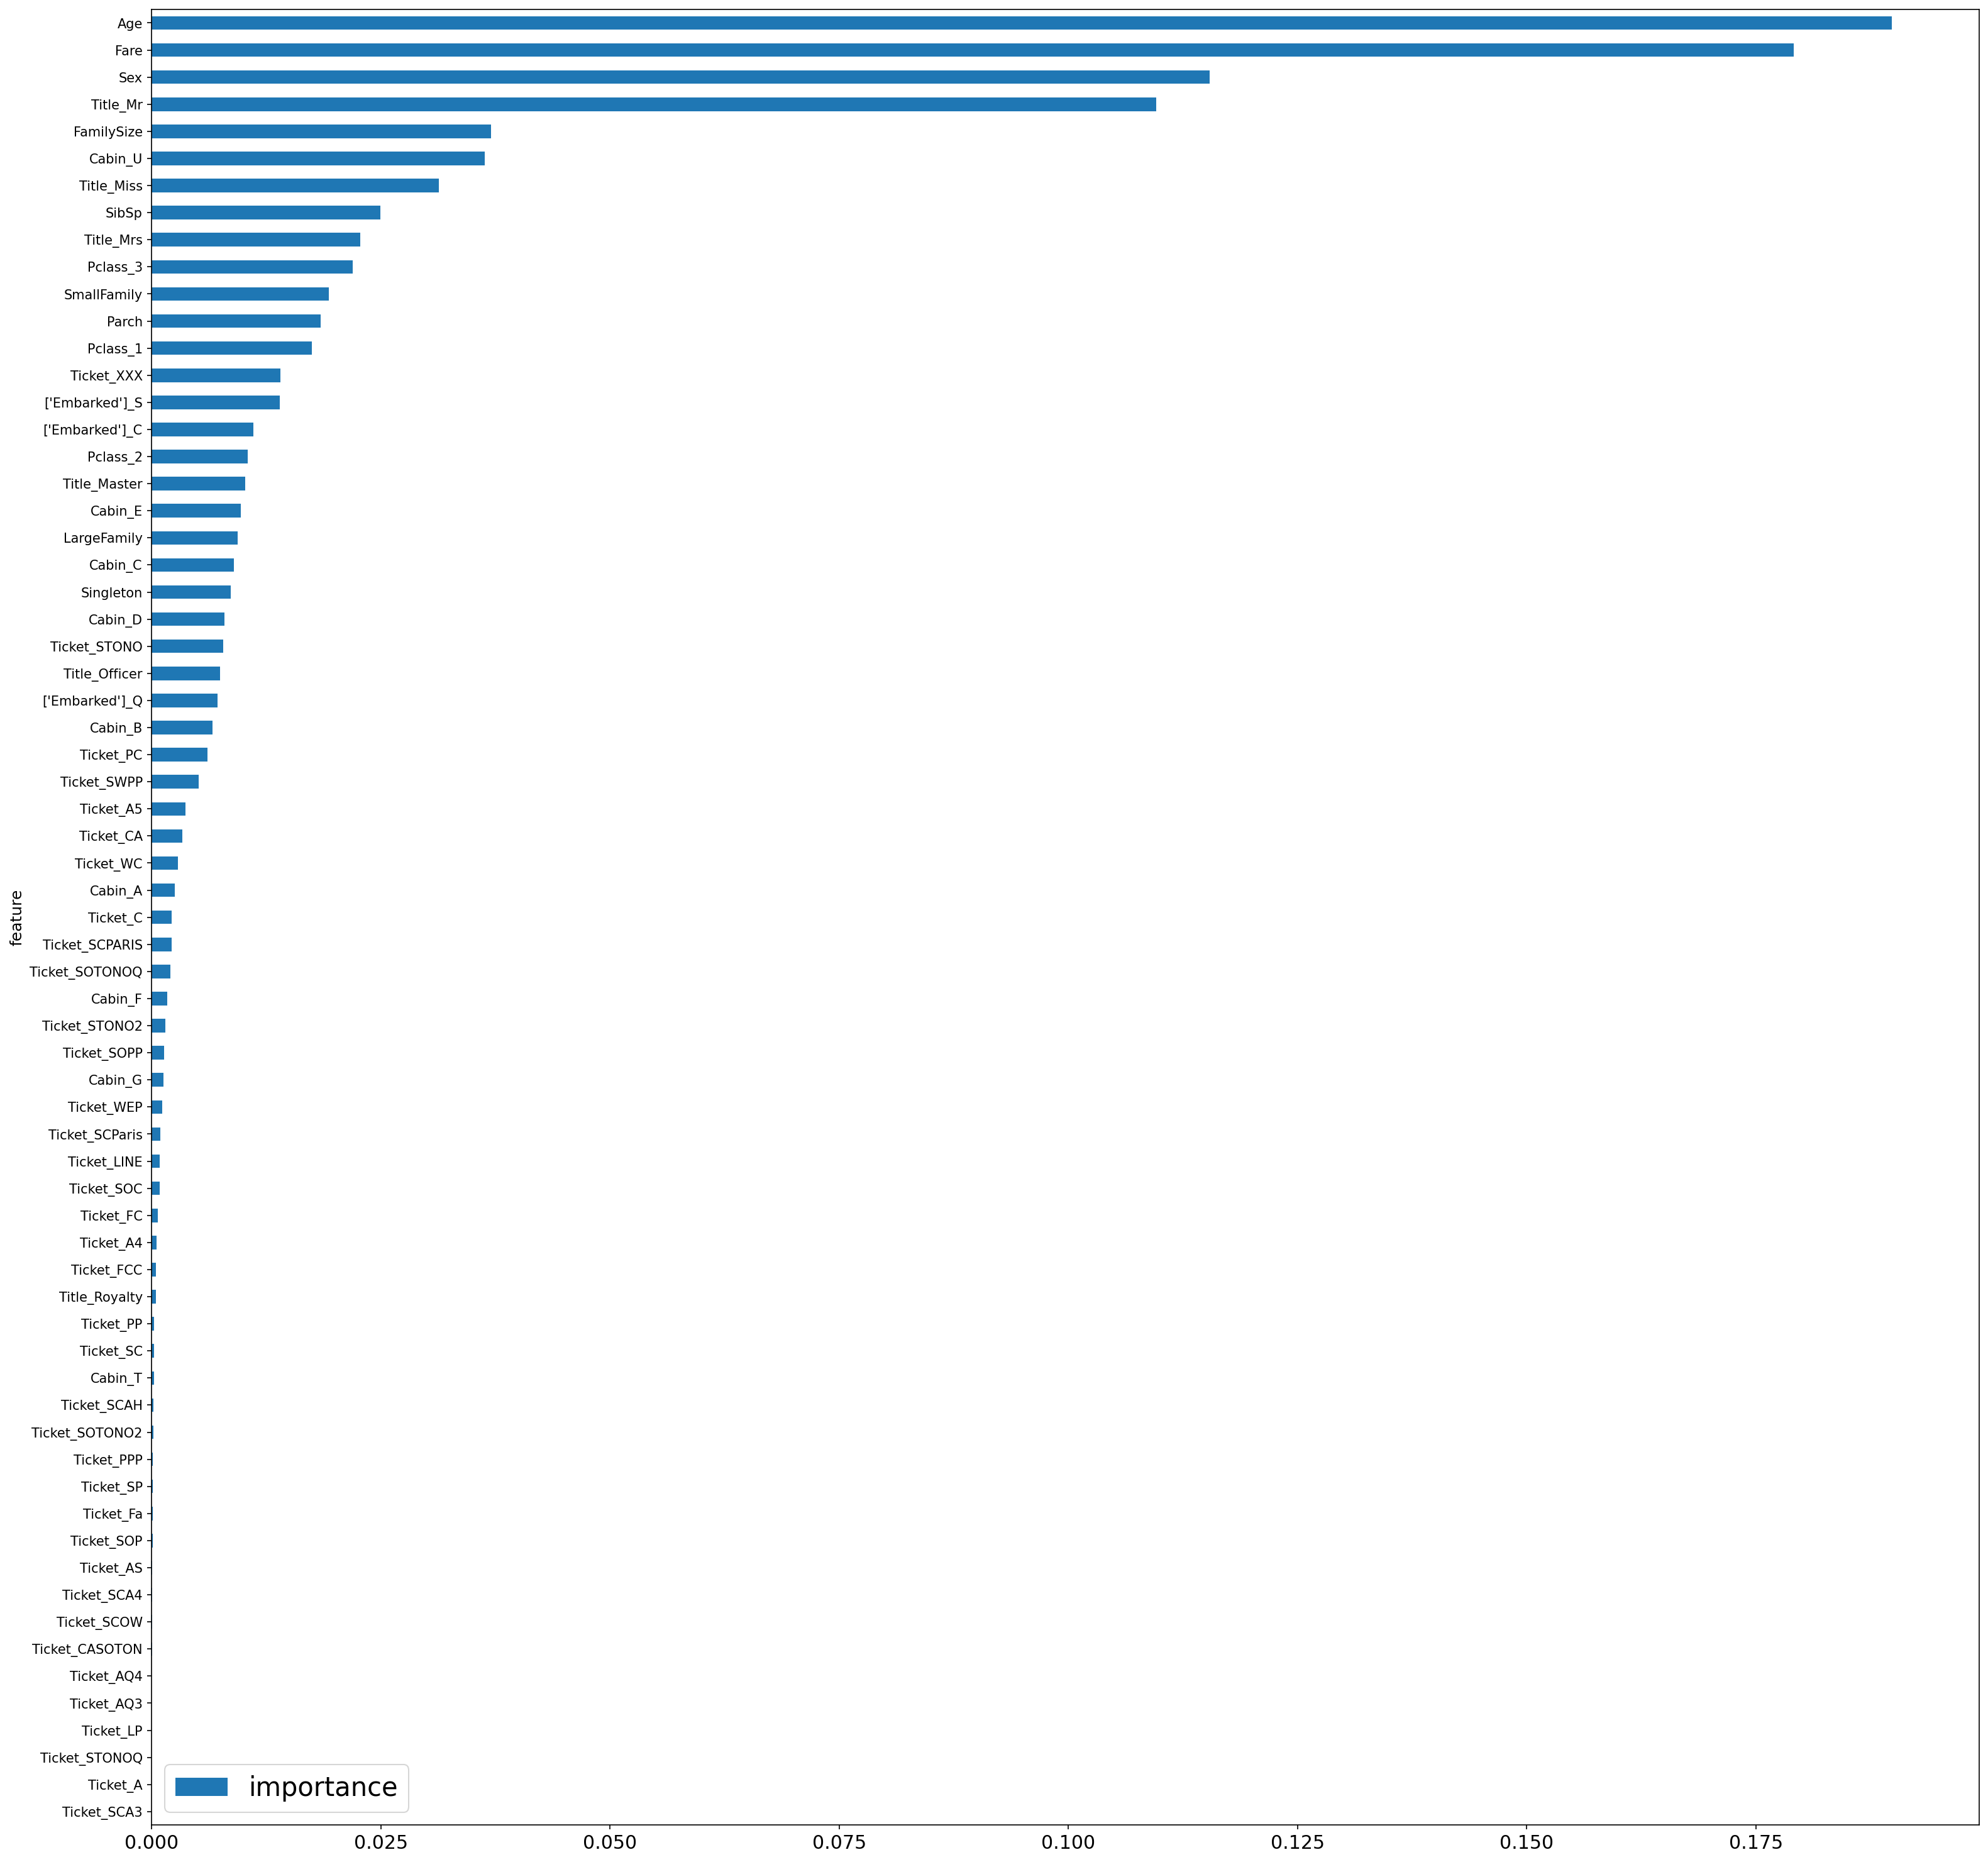

In [298]:
features.plot(kind='barh', figsize=(25, 25))

Como você pode perceber, existe uma grande importância associada a Title_Mr, Age, Fare e Sex.

Também há uma correlação importante com o Passenger_Id.

Vamos agora transformar nosso conjunto de treinamento e conjunto de teste em conjuntos de dados mais compactos.

In [300]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

(891, 13)


In [301]:
test_reduced = model.transform(test)
print(test_reduced.shape)

(418, 13)



Yay! Agora temos muito menos características.

Vamos ver se usaremos a versão reduzida ou a versão completa do conjunto de treinamento.

### Vamos experimentar diferentes modelos básicos.

In [302]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [303]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (3577533180.py, line 2)